# Install dependencies

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Loading YOLOv5

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/shaikmohammadasrarahammad/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-2-6 Python-3.10.8 torch-1.13.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

# Make detection

In [3]:
img = 'https://c4.wallpaperflare.com/wallpaper/373/735/618/beautiful-pink-flamingo-birds-wallpaper-hd-8456-wallpaper-preview.jpg'

In [4]:
result = model(img)
result.print()

image 1/1: 455x728 7 birds
Speed: 1188.5ms pre-process, 88.4ms inference, 7.4ms NMS per image at shape (1, 3, 416, 640)


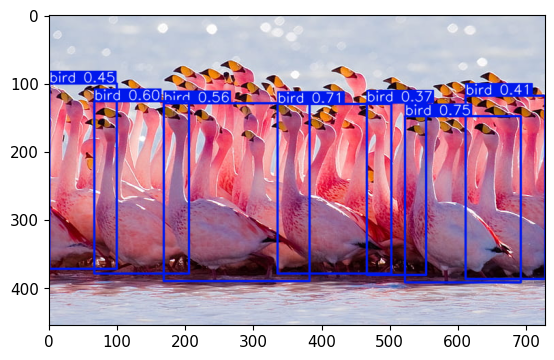

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

# Real time rendering

In [48]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()


    # make detections 
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train model from scratch

In [2]:
import uuid # unique identifier
import os 
import time

In [11]:
IMAGES_PATH = os.path.join('data', 'images') # data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [12]:
cap = cv2.VideoCapture(0)
# Loop through images
for label in labels:
    print('Collecting images for {}', format(label))
    time.sleep(5)

    # Loop through images
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        ret, frame = cap.read()

        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame) # write image to file
        cv2.imshow('Image collection', frame) # render to screen
        time.sleep(2) # 2 sec delay between captures


    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [25]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 10 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.8 torch-1.13.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, sca

# Load model

In [3]:
model_custom = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/shaikmohammadasrarahammad/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-2-6 Python-3.10.8 torch-1.13.1 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data','images','awake.b80b07e6-9e07-11ed-a4da-220366a1cd78.jpg')

In [7]:
results = model_custom(img)

In [40]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()


    # make detections 
    results = model_custom(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()